# Q6 - SVM Programming

***In this question, you will employ SVM to solve a classification problem for the provided data file "hw3q6.csv". Each row in the data file indicates a sample. The first 12 columns are features and the last column "Class" indicates the label, with 1 and 0 indicating the positive and negative samples, respectively.***

## Import Libraries

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import numpy as np
import sys
import os

%matplotlib inline

## (a) Load data. Report the size of positive and negative samples in dataset

In [18]:
def data_and_headers(filename):
    data = None
    with open(filename) as fp:
        data = [x.strip().split(',') for x in fp.readlines()]
    headers = data[0]
    headers = np.asarray(headers)
    class_field = len(headers) - 1
    data_x = [[float(x[i]) for i in range(class_field)] for x in data[1:]]
    data_x = np.asarray(data_x)
    data_y = [[int(x[i]) for i in range(class_field, class_field + 1)] for x in data[1:]]
    data_y = np.asarray(data_y)
    return headers, data_x, data_y

In [19]:
headers, features_x, labels_y = data_and_headers('Data' + os.sep + 'hw3q6.csv')

In [20]:
print('Data')
print('Number of features - ' + str(features_x.shape[1]))
print('Total Number of observations - ' + str(features_x.shape[0]))
print('Number of Positive Samples - ' + str(labels_y[labels_y==1].shape[0]))
print('Number of Negative Samples - ' + str(labels_y[labels_y==0].shape[0]))
print()

Data
Number of features - 12
Total Number of observations - 200
Number of Positive Samples - 90
Number of Negative Samples - 110



## (b) Use stratified random sampling to divide the dataset into training data (75%) and testing data (25%). Report the number of positive and negative samples in both training and testing data.

In [21]:
train_x, test_x, train_y, test_y = train_test_split(features_x,
                                                    labels_y,
                                                    test_size=0.25,
                                                    random_state=10,
                                                    shuffle=True,
                                                    stratify=labels_y)

In [22]:
print('Training Data')
print('Number of features - ' + str(train_x.shape[1]))
print('Total Number of observations - ' + str(train_x.shape[0]))
print('Number of Positive Samples - ' + str(train_y[train_y==1].shape[0]))
print('Number of Negative Samples - ' + str(train_y[train_y==0].shape[0]))
print()
print('Testing Data')
print('Number of features - ' + str(test_x.shape[1]))
print('Total Number of observations - ' + str(test_x.shape[0]))
print('Number of Positive Samples - ' + str(test_y[test_y==1].shape[0]))
print('Number of Negative Samples - ' + str(test_y[test_y==0].shape[0]))
print()

Training Data
Number of features - 12
Total Number of observations - 150
Number of Positive Samples - 67
Number of Negative Samples - 83

Testing Data
Number of features - 12
Total Number of observations - 50
Number of Positive Samples - 23
Number of Negative Samples - 27



## (c) Take SVM with linear kernel as classifier (third-party packages are allowed to use) and set the regularization parameter C as: [0.1, 0.5, 1, 5, 10, 50, 100], respectively. For each value of C, train a SVM classifier with the training data and get the number of support vectors (SVs). Generate a plot with C as the horizontal axis and number of SVs as the vertical axis. Give a brief analysis for the plot.

In [23]:
C = [0.1, 0.5, 1, 5, 10, 50, 100]
models = [SVC(C[i],'linear',random_state=10).fit(train_x,train_y.flatten()) for i in range(len(C))]

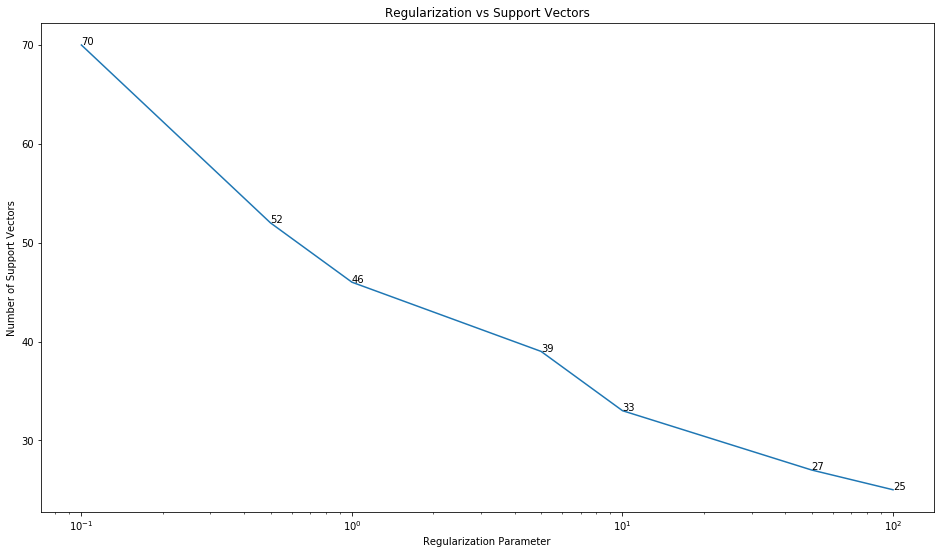

In [24]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title('Regularization vs Support Vectors')
ax.set_ylabel('Number of Support Vectors')
ax.set_xlabel('Regularization Parameter')
ax.set_xscale('log')
plty = [x.support_.shape[0] for x in models]
#ax.bar(C, plty, color='orange')
ax.plot(C, plty)
for i, txt in enumerate(C):
    ax.annotate(plty[i], (C[i], plty[i]))
plt.show()

## (d) Compare 4 different kernel functions, including linear, polynomial, radial basic function (Gaussian kernel), and sigmoid kernel. Make a table to record the accuracy, precision, recall and f-measure of the classification results for the 4 kernel functions. Try to tune the parameters via grid search and report your best results with the optimal parameters. Based on the results, which kernel function will you choose?

### Linear Kernel

In [25]:
param_grid = [
    {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
     'kernel':['linear']}
]

lsvc = SVC(random_state=10)
linear_clf = GridSearchCV(lsvc, param_grid,
                   ['f1', 'accuracy', 'recall', 'precision'],
                   cv=5, refit='accuracy', verbose=1, n_jobs=4)
linear_clf.fit(train_x, train_y.flatten())
y_pred = linear_clf.predict(test_x)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  55 out of  55 | elapsed:    0.3s finished
/Users/achauhan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
print('Best Parameters - ')
print(linear_clf.best_params_)
print()
print('Linear Kernel Classification Results on Test Set with Optimal Parameters')
print('Accuracy - \t{:.4f}'.format(accuracy_score(test_y.flatten(), y_pred)))
print('F1 Score - \t{:.4f}'.format(f1_score(test_y.flatten(), y_pred)))
print('Precision - \t{:.4f}'.format(precision_score(test_y.flatten(), y_pred)))
print('Recall - \t{:.4f}'.format(recall_score(test_y.flatten(), y_pred)))

Best Parameters - 
{'C': 10, 'kernel': 'linear'}

Linear Kernel Classification Results on Test Set with Optimal Parameters
Accuracy - 	0.9600
F1 Score - 	0.9565
Precision - 	0.9565
Recall - 	0.9565


### Radial Basis Function

In [27]:
param_grid = [
    {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
     'kernel':['rbf'],
     'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
]

rsvc = SVC(random_state=10)
radial_clf = GridSearchCV(rsvc, param_grid,
                   ['f1', 'accuracy', 'recall', 'precision'],
                   cv=5, refit='accuracy', verbose=1, n_jobs=4)
radial_clf.fit(train_x, train_y.flatten())
y_pred = radial_clf.predict(test_x)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 110 candidates, totalling 550 fits


[Parallel(n_jobs=4)]: Done 550 out of 550 | elapsed:    1.4s finished
/Users/achauhan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [28]:
print('Best Parameters - ')
print(radial_clf.best_params_)
print()
print('Radial Basis Function Kernel Classification Results on Test Set with Optimal Parameters')
print('Accuracy - \t{:.4f}'.format(accuracy_score(test_y.flatten(), y_pred)))
print('F1 Score - \t{:.4f}'.format(f1_score(test_y.flatten(), y_pred)))
print('Precision - \t{:.4f}'.format(precision_score(test_y.flatten(), y_pred)))
print('Recall - \t{:.4f}'.format(recall_score(test_y.flatten(), y_pred)))

Best Parameters - 
{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

Radial Basis Function Kernel Classification Results on Test Set with Optimal Parameters
Accuracy - 	0.9800
F1 Score - 	0.9778
Precision - 	1.0000
Recall - 	0.9565


### Polynomial Kernel

In [29]:
param_grid = [
    {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
     'kernel':['poly'],
     'degree':[2,3,4,5,6],
     'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
     'coef0': [0.1,0.5,1.0,1.5,2.0,5.0,10.0,20.0]}
]

psvc = SVC(random_state=10)
poly_clf = GridSearchCV(psvc, param_grid,
                   ['f1', 'accuracy', 'recall', 'precision'],
                   cv=5, refit='accuracy', verbose=1, n_jobs=4)
poly_clf.fit(train_x, train_y.flatten())
y_pred = poly_clf.predict(test_x)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 4400 candidates, totalling 22000 fits


[Parallel(n_jobs=4)]: Done 756 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 4056 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done 9556 tasks      | elapsed:   20.5s
[Parallel(n_jobs=4)]: Done 17256 tasks      | elapsed:   34.6s
[Parallel(n_jobs=4)]: Done 22000 out of 22000 | elapsed:   43.7s finished
/Users/achauhan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
print('Best Parameters - ')
print(poly_clf.best_params_)
print()
print('Polynomial Kernel Classification Results on Test Set with Optimal Parameters')
print('Accuracy - \t{:.4f}'.format(accuracy_score(test_y.flatten(), y_pred)))
print('F1 Score - \t{:.4f}'.format(f1_score(test_y.flatten(), y_pred)))
print('Precision - \t{:.4f}'.format(precision_score(test_y.flatten(), y_pred)))
print('Recall - \t{:.4f}'.format(recall_score(test_y.flatten(), y_pred)))

Best Parameters - 
{'C': 0.001, 'coef0': 5.0, 'degree': 4, 'gamma': 0.8, 'kernel': 'poly'}

Polynomial Kernel Classification Results on Test Set with Optimal Parameters
Accuracy - 	0.9600
F1 Score - 	0.9565
Precision - 	0.9565
Recall - 	0.9565


### Sigmoid Kernel

In [31]:
param_grid = [
    {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
     'kernel':['sigmoid'],
     'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
     'coef0': [0.1,0.5,1.0,1.5,2.0,5.0,10.0,20.0]}
]

ssvc = SVC(random_state=10)
sig_clf = GridSearchCV(ssvc, param_grid,
                   ['f1', 'accuracy', 'recall', 'precision'],
                   cv=5, refit='accuracy', verbose=1, n_jobs=4)
sig_clf.fit(train_x, train_y.flatten())
y_pred = sig_clf.predict(test_x)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 880 candidates, totalling 4400 fits


[Parallel(n_jobs=4)]: Done 416 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 2216 tasks      | elapsed:   15.1s
[Parallel(n_jobs=4)]: Done 4400 out of 4400 | elapsed:   20.9s finished
/Users/achauhan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
print('Best Parameters - ')
print(sig_clf.best_params_)
print()
print('Sigmoid Kernel Classification Results on Test Set with Optimal Parameters')
print('Accuracy - \t{:.4f}'.format(accuracy_score(test_y.flatten(), y_pred)))
print('F1 Score - \t{:.4f}'.format(f1_score(test_y.flatten(), y_pred)))
print('Precision - \t{:.4f}'.format(precision_score(test_y.flatten(), y_pred)))
print('Recall - \t{:.4f}'.format(recall_score(test_y.flatten(), y_pred)))

Best Parameters - 
{'C': 0.05, 'coef0': 0.1, 'gamma': 0.3, 'kernel': 'sigmoid'}

Sigmoid Kernel Classification Results on Test Set with Optimal Parameters
Accuracy - 	0.9000
F1 Score - 	0.9020
Precision - 	0.8214
Recall - 	1.0000
